In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import cartopy.crs as ccrs

# Import API key
from api_keys import geoapify_key

# Study data files
mort_female_path = "Data/mortality_rate_female.csv"
mort_male_path = "Data/mortality_rate_male.csv"
life_df_path = "Data/life_df.csv"
# Read the mouse data and the study results
mort_female = pd.read_csv(mort_female_path)
mort_male = pd.read_csv(mort_male_path )
life_df = pd.read_csv(life_df_path) 

# Combine the mortality data into a single DataFrame
mort_data_complete = pd.merge(mort_female, mort_male, how="left", on=["Country Name", "Country Name"])


# Display the data table for preview
mort_data_complete.head()

ModuleNotFoundError: No module named 'api_keys'

In [2]:

# Create a list of column we want to analyze

columns_to_analyze = ['Country Name', '2019_x', '2019_y', '2020_x', '2020_y', '2021_x', '2021_y']

# Extract the specified columns into a new DataFrame
mort_df = mort_data_complete[columns_to_analyze]

#Rename Columns
# Create a dictionary of column name changes
column_names = {'2019_x': '2019 Female Mortality', '2019_y': '2019 Male Mortality', '2020_x': '2020 Female Mortality', '2020_y': '2020 Male Mortality','2021_x': '2021 Female Mortality', '2021_y': '2021 Male Mortality'}

# Rename the columns using the dictionary
mort_df = mort_df.rename(columns=column_names)


# Print the new DataFrame
mort_df.head()


,Country Name,2019 Female Mortality,2019 Male Mortality,2020 Female Mortality,2020 Male Mortality,2021 Female Mortality,2021 Male Mortality
0,Aruba,58.036000,124.312000,59.682000,124.099000,70.365000,140.466000
1,Africa Eastern and Southern,218.643323,302.772441,224.232063,311.485312,237.602742,332.823557
2,Afghanistan,190.261000,305.768000,210.053000,318.587000,214.241000,342.158000
3,Africa Western and Central,292.122943,326.635576,297.189740,337.587341,305.218821,346.620097
4,Angola,214.355000,305.594000,212.645000,313.481000,227.092000,331.364000


In [3]:
#Merge the mortality data and the life expectancy/medical doctor/average immunization data together 
mort_life = pd.merge(mort_df, life_df, how="left", on=["Country Name", "Country Name"])


# Display the data table for preview
mort_life.head()

,Country Name,2019 Female Mortality,2019 Male Mortality,2020 Female Mortality,2020 Male Mortality,2021 Female Mortality,2021 Male Mortality,Life expectancy total population,Average Immunization,Medical doctors (number)
0,Aruba,58.036000,124.312000,59.682000,124.099000,70.365000,140.466000,NaN,NaN,NaN
1,Africa Eastern and Southern,218.643323,302.772441,224.232063,311.485312,237.602742,332.823557,NaN,NaN,NaN
2,Afghanistan,190.261000,305.768000,210.053000,318.587000,214.241000,342.158000,64.149149,65.133333,9500.4
3,Africa Western and Central,292.122943,326.635576,297.189740,337.587341,305.218821,346.620097,NaN,NaN,NaN
4,Angola,214.355000,305.594000,212.645000,313.481000,227.092000,331.364000,60.446212,53.800000,6496.5


In [4]:
#Plot the 15 countries with the highest life expectancy
sortedtop_life_df = mort_life.sort_values(by=['Life expectancy total population'], ascending=False)

sortedtop_life_df.head(15)

,Country Name,2019 Female Mortality,2019 Male Mortality,2020 Female Mortality,2020 Male Mortality,2021 Female Mortality,2021 Male Mortality,Life expectancy total population,Average Immunization,Medical doctors (number)
119,Japan,35.483,64.375,35.611,64.547,35.660,64.319,84.247228,97.800000,311755.500000
37,Switzerland,32.207,54.626,32.498,56.763,33.005,56.880,83.567678,86.533333,36183.600000
70,Spain,35.743,69.721,38.335,74.422,NaN,NaN,83.391822,96.533333,186539.000000
116,Italy,35.534,61.477,NaN,NaN,NaN,NaN,83.172241,92.866667,239300.400000
208,Singapore,31.748,56.933,34.295,58.622,33.265,56.184,83.050048,95.733333,13371.400000
77,France,47.023,91.761,46.883,92.936,NaN,NaN,82.731173,92.133333,209756.400000
13,Australia,42.391,75.193,41.652,73.018,NaN,NaN,82.665681,94.600000,90220.000000
177,Norway,37.433,60.834,37.226,59.917,NaN,NaN,82.626965,96.000000,24890.400000
115,Israel,NaN,NaN,NaN,NaN,NaN,NaN,82.579647,96.800000,28893.600000
114,Iceland,45.372,64.223,42.484,66.072,NaN,NaN,82.565586,88.169262,1329.600000


In [5]:
#Plot the 15 countries with the lowest life expectancy
sortedbottom_life_df = mort_life.sort_values(by=['Life expectancy total population'], ascending=True)

sortedbottom_life_df.head(15)

,Country Name,2019 Female Mortality,2019 Male Mortality,2020 Female Mortality,2020 Male Mortality,2021 Female Mortality,2021 Male Mortality,Life expectancy total population,Average Immunization,Medical doctors (number)
34,Central African Republic,357.250,431.280,367.440,448.540,378.354,472.339,52.170470,47.666667,329.500000
141,Lesotho,406.656,516.418,393.666,504.362,432.957,552.668,52.931118,87.666667,998.000000
229,Chad,330.834,393.335,344.715,408.621,352.065,423.490,53.706891,42.866667,709.800000
210,Sierra Leone,217.502,255.168,228.946,270.279,229.627,266.648,53.833848,87.933333,566.000000
174,Nigeria,357.041,370.397,357.014,377.226,366.108,386.451,53.931194,52.066667,79054.000000
216,South Sudan,303.281,360.368,307.034,370.950,316.767,379.954,57.394850,47.266667,411.000000
87,Guinea-Bissau,249.391,324.474,261.521,353.359,274.539,362.432,57.622945,86.733333,299.666667
88,Equatorial Guinea,230.424,291.035,243.056,318.217,250.645,321.862,58.089527,51.066667,507.000000
224,Eswatini,293.304,464.463,300.993,484.633,343.638,545.723,58.322454,88.866667,197.666667
158,Mali,235.567,284.075,257.229,312.723,253.914,311.356,58.421020,73.466667,2174.500000


In [6]:
#Analyze the data for the top 5 countries with the best life expectancy
# Create a list of countries to extract
countries = ['Japan', 'Switzerland', 'Spain', 'Italy', 'Singapore']

# Extract rows where Country Name is in the list of countries
top_life = mort_life[mort_life['Country Name'].isin(countries)]

# Display the selected rows
top_life

,Country Name,2019 Female Mortality,2019 Male Mortality,2020 Female Mortality,2020 Male Mortality,2021 Female Mortality,2021 Male Mortality,Life expectancy total population,Average Immunization,Medical doctors (number)
37,Switzerland,32.207,54.626,32.498,56.763,33.005,56.880,83.567678,86.533333,36183.6
70,Spain,35.743,69.721,38.335,74.422,NaN,NaN,83.391822,96.533333,186539.0
116,Italy,35.534,61.477,NaN,NaN,NaN,NaN,83.172241,92.866667,239300.4
119,Japan,35.483,64.375,35.611,64.547,35.660,64.319,84.247228,97.800000,311755.5
208,Singapore,31.748,56.933,34.295,58.622,33.265,56.184,83.050048,95.733333,13371.4


In [7]:
#Remove Spain and Italy from the dataset as they have missing data from 2020 and/or 2021. Add the next two top countries with the highest life expectancies and data for the mortality rate in 2020 and 2021 (Swedan and Luxembourg).
#Analyze the data for the top 5 countries with the best life expectancy
# Create a list of countries to extract
countries = ['Japan', 'Switzerland', 'Singapore', 'Sweden', 'Luxembourg',]

# Extract rows where Country Name is in the list of countries
top_life = mort_life[mort_life['Country Name'].isin(countries)]

# Display the selected rows
top_life

,Country Name,2019 Female Mortality,2019 Male Mortality,2020 Female Mortality,2020 Male Mortality,2021 Female Mortality,2021 Male Mortality,Life expectancy total population,Average Immunization,Medical doctors (number)
37,Switzerland,32.207,54.626,32.498,56.763,33.005,56.880,83.567678,86.533333,36183.600000
119,Japan,35.483,64.375,35.611,64.547,35.660,64.319,84.247228,97.800000,311755.500000
144,Luxembourg,38.902,66.112,37.235,68.632,37.543,65.229,82.409075,97.600000,1706.333333
208,Singapore,31.748,56.933,34.295,58.622,33.265,56.184,83.050048,95.733333,13371.400000
223,Sweden,37.733,58.136,36.660,60.859,36.638,59.257,82.523895,90.600000,48191.200000


In [8]:
#Analyze the data for the 5 countries with the worst life expectancy
# Create a list of countries to extract
countries = ['Central African Republic', 'Lesotho', 'Chad', 'Sierra Leone', 'Nigeria']

# Extract rows where Country Name is in the list of countries
low_life = mort_life[mort_life['Country Name'].isin(countries)]

# Display the selected rows
low_life

,Country Name,2019 Female Mortality,2019 Male Mortality,2020 Female Mortality,2020 Male Mortality,2021 Female Mortality,2021 Male Mortality,Life expectancy total population,Average Immunization,Medical doctors (number)
34,Central African Republic,357.250,431.280,367.440,448.540,378.354,472.339,52.170470,47.666667,329.5
141,Lesotho,406.656,516.418,393.666,504.362,432.957,552.668,52.931118,87.666667,998.0
174,Nigeria,357.041,370.397,357.014,377.226,366.108,386.451,53.931194,52.066667,79054.0
210,Sierra Leone,217.502,255.168,228.946,270.279,229.627,266.648,53.833848,87.933333,566.0
229,Chad,330.834,393.335,344.715,408.621,352.065,423.490,53.706891,42.866667,709.8


## Bar graphs of mortality rates (per 1000 adults) of top 5 and bottom 5 countries in terms of life expectancy pre-covid and during covid from 2019 to 2021

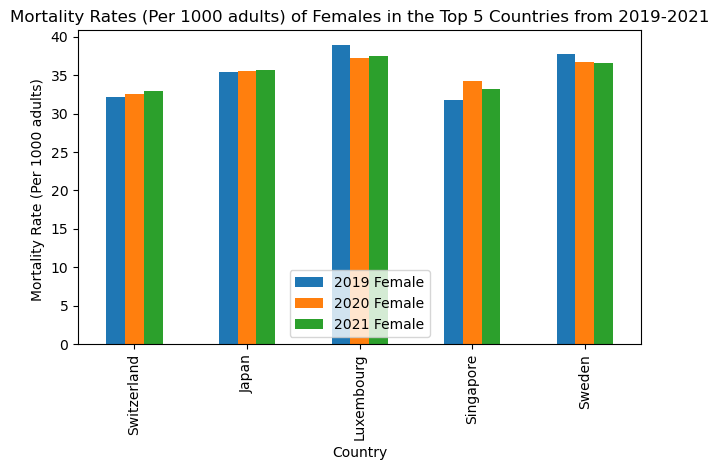

In [17]:
# Generate a bar of Years vs. Mortality Rate for females in the top 5 countries

top_life.plot(x='Country Name', y=['2019 Female Mortality', '2020 Female Mortality', '2021 Female Mortality'], kind='bar')

# Set the figure size
plt.xlabel('Country')
plt.ylabel('Mortality Rate (Per 1000 adults) ')
plt.title('Mortality Rates (Per 1000 adults) of Females in the Top 5 Countries from 2019-2021')
plt.legend(['2019 Female', '2020 Female', '2021 Female'], loc='best')

plt.tight_layout()
plt.show()


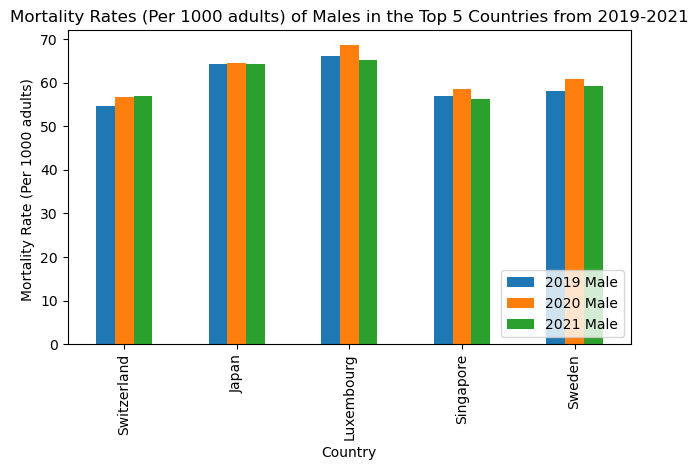

In [21]:
# Generate a bar graph of Years vs. Mortality Rate for males in the top 5 countries

top_life.plot(x='Country Name', y=['2019 Male Mortality', '2020 Male Mortality', '2021 Male Mortality'], kind='bar')

# Set the figure size
plt.xlabel('Country')
plt.ylabel('Mortality Rate (Per 1000 adults) ')
plt.title('Mortality Rates (Per 1000 adults) of Males in the Top 5 Countries from 2019-2021')
plt.legend(['2019 Male', '2020 Male', '2021 Male'], loc='lower right')

plt.tight_layout()
plt.show()



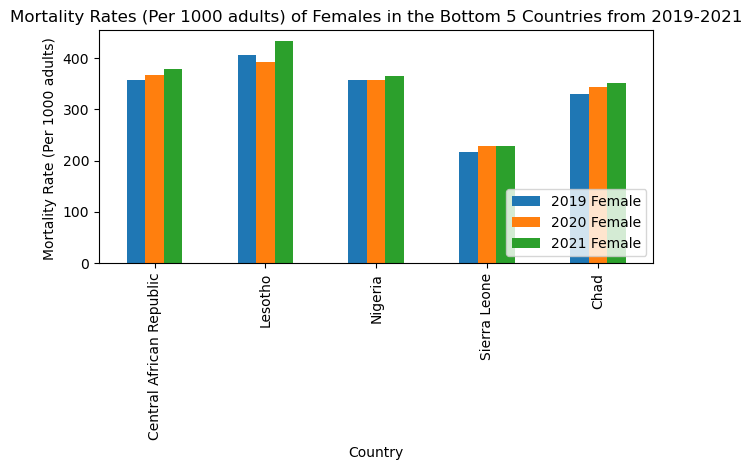

In [20]:
# Generate a bar graph of Years vs. Mortality Rate for females in the bottom 5 countries

low_life.plot(x='Country Name', y=['2019 Female Mortality', '2020 Female Mortality', '2021 Female Mortality'], kind='bar')

# Set the figure size
plt.xlabel('Country')
plt.ylabel('Mortality Rate (Per 1000 adults) ')
plt.title('Mortality Rates (Per 1000 adults) of Females in the Bottom 5 Countries from 2019-2021')
plt.legend(['2019 Female', '2020 Female', '2021 Female'], loc='lower right')

plt.tight_layout()
plt.show()


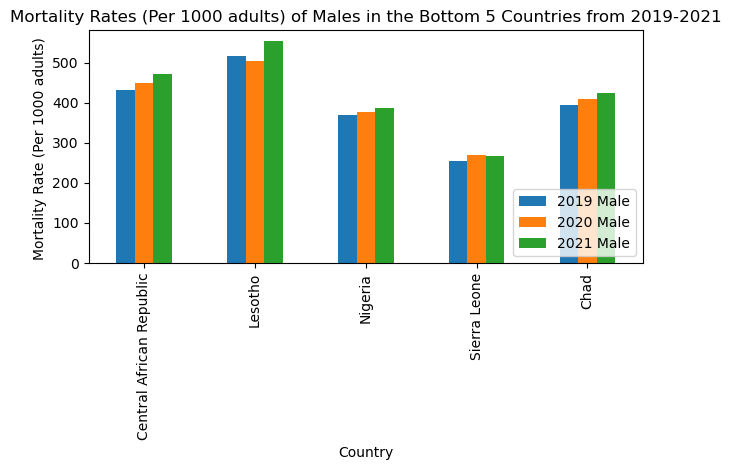

In [19]:
# Generate a bar graph of Years vs. Mortality Rate for males in the bottom 5 countries

low_life.plot(x='Country Name', y=['2019 Male Mortality', '2020 Male Mortality', '2021 Male Mortality'], kind='bar')

# Set the figure size
plt.xlabel('Country')
plt.ylabel('Mortality Rate (Per 1000 adults) ')
plt.title('Mortality Rates (Per 1000 adults) of Males in the Bottom 5 Countries from 2019-2021')
plt.legend(['2019 Male', '2020 Male', '2021 Male'], loc='lower right')

plt.tight_layout()
plt.show()



## Plot Map 

In [16]:
#Assess the top 5 countries and bottom 5 countries

outline_df =  countries = ['Japan', 'Switzerland', 'Singapore', 'Sweden', 'Luxembourg','Central African Republic', 'Lesotho', 'Chad', 'Sierra Leone', 'Nigeria']

# Extract rows where Country Name is in the list of countries
outline_df = mort_life[mort_life['Country Name'].isin(countries)]

#Sort the values from highest life expectancy to lowest
outline_df = outline_df.sort_values(by=['Life expectancy total population'], ascending=False)


outline_df

,Country Name,2019 Female Mortality,2019 Male Mortality,2020 Female Mortality,2020 Male Mortality,2021 Female Mortality,2021 Male Mortality,Life expectancy total population,Average Immunization,Medical doctors (number)
119,Japan,35.483,64.375,35.611,64.547,35.660,64.319,84.247228,97.800000,311755.500000
37,Switzerland,32.207,54.626,32.498,56.763,33.005,56.880,83.567678,86.533333,36183.600000
208,Singapore,31.748,56.933,34.295,58.622,33.265,56.184,83.050048,95.733333,13371.400000
223,Sweden,37.733,58.136,36.660,60.859,36.638,59.257,82.523895,90.600000,48191.200000
144,Luxembourg,38.902,66.112,37.235,68.632,37.543,65.229,82.409075,97.600000,1706.333333
174,Nigeria,357.041,370.397,357.014,377.226,366.108,386.451,53.931194,52.066667,79054.000000
210,Sierra Leone,217.502,255.168,228.946,270.279,229.627,266.648,53.833848,87.933333,566.000000
229,Chad,330.834,393.335,344.715,408.621,352.065,423.490,53.706891,42.866667,709.800000
141,Lesotho,406.656,516.418,393.666,504.362,432.957,552.668,52.931118,87.666667,998.000000
34,Central African Republic,357.250,431.280,367.440,448.540,378.354,472.339,52.170470,47.666667,329.500000


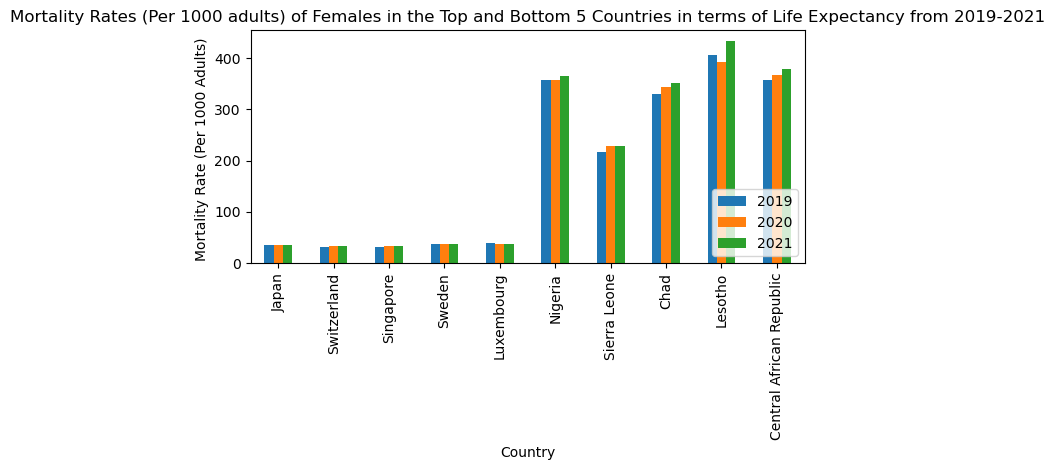

In [27]:
# Generate a bar plot of Years vs. Mortality Rate for females in the top 5 and bottom 5 countries

outline_df.plot(x='Country Name', y=['2019 Female Mortality', '2020 Female Mortality', '2021 Female Mortality'], kind='bar')

# Set the figure size
plt.xlabel('Country')
plt.ylabel('Mortality Rate (Per 1000 Adults) ')
plt.title('Mortality Rates (Per 1000 adults) of Females in the Top and Bottom 5 Countries in terms of Life Expectancy from 2019-2021')
plt.legend(['2019', '2020', '2021'], loc='lower right')

plt.tight_layout()
plt.show()

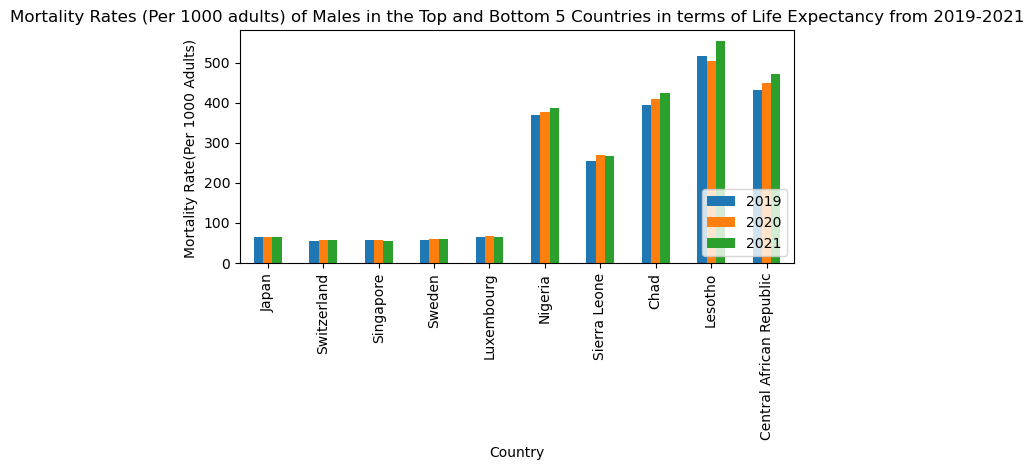

In [30]:
# Generate a bar graph of Years vs. Mortality Rate for males in the top and bottom 5 countries in terms of life expectancy

outline_df.plot(x='Country Name', y=['2019 Male Mortality', '2020 Male Mortality', '2021 Male Mortality'], kind='bar')


plt.xlabel('Country')
plt.ylabel('Mortality Rate(Per 1000 Adults) ')
plt.title('Mortality Rates (Per 1000 adults) of Males in the Top and Bottom 5 Countries in terms of Life Expectancy from 2019-2021')
plt.legend(['2019', '2020', '2021'], loc='lower right')

plt.tight_layout()
plt.show()

